# Cube Example - Basic Usage
In this tutorial you will learn the basic usage of EncoderMap with a little toy data set.

Run this notebook on Google Colab:

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AG-Peter/encodermap/blob/main/tutorials/notebooks_starter/01_Basic_Usage-Cube_Example.ipynb)

Find the documentation of EncoderMap:

https://ag-peter.github.io/encodermap

### For Google colab only:

If you're on Google colab, please uncomment these lines and install EncoderMap.

In [1]:
# !wget https://raw.githubusercontent.com/AG-Peter/encodermap/main/tutorials/install_encodermap_google_colab.sh
# !sudo bash install_encodermap_google_colab.sh

## Import Libraries
Before we can get started using EncoderMap we first need to import the EncoderMap library:

In [2]:
import encodermap as em

2023-02-06 17:09:59.134478: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-06 17:09:59.259644: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/hostedtoolcache/Python/3.9.16/x64/lib
2023-02-06 17:09:59.259664: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


2023-02-06 17:09:59.908210: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/hostedtoolcache/Python/3.9.16/x64/lib
2023-02-06 17:09:59.908288: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/hostedtoolcache/Python/3.9.16/x64/lib
2023-02-06 17:09:59.908295: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


We will also need some aditional imports for plotting:

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

To ensure that this notebook yields reproducible output, we fix the randomness in tensorflow.

In [4]:
import tensorflow as tf
tf.random.set_seed(3)

## Load Data
Next, we need to load our data. EncoderMap expects the input data to be a 2d array. Each line should contain one data point and the number of columns is the dimensionality of the data set. Here, you could load data from any source. In this tutorial, however, we will use a function to generate a toy data set. The function `random_on_cube_edges` distributes a given number of points randomly on the edges of a cube. We can also add some Gaussian noise by specifying a sigma value.

In [5]:
high_d_data, ids = em.misc.create_n_cube()

let's look at the data we have just created:

In [6]:
print("high_d_data\n", high_d_data, '\n')
print("ids\n", ids)

high_d_data
 [[ 0.07830757  0.01476928 -0.02240795]
 [-0.05769798  0.02501793 -0.05822237]
 [-0.02551273 -0.11392797 -0.11680931]
 ...
 [ 0.9825762   0.99062634  0.93130682]
 [ 0.96435786  1.0805752   1.06388343]
 [ 1.04294467  0.93653472  1.09709519]] 

ids
 [ 1.  1.  1. ... 11. 11. 11.]


`high_d_data` is a 2d array where each row represents one point in a 3d space. `ids` contains a number form 0 to 11 for each point. This number tells us which edge of the cube each point belongs to. We can use these `ids` to color the points in a plot. The following code creates a scatter plot of the data: 

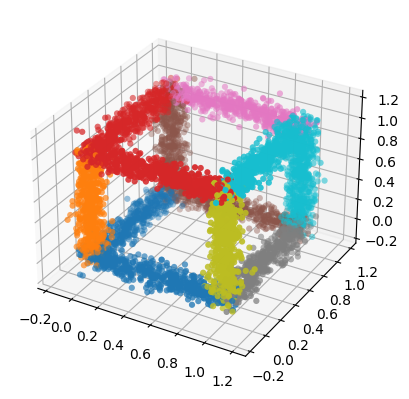

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(high_d_data[:, 0], high_d_data[:, 1], high_d_data[:, 2], 
            c=ids, marker="o", linewidths=0, cmap="tab10")

## Select Parameters
Now  that we have loaded our data we need to select parameters for EncoderMap. Parameters are stored in an object derived from the `Parameters` class. A list of the available parameters can be found [here](https://ag-peter.github.io/encodermap/docbuild/html/parameters.html#module-encodermap.parameters). We do not need to bother with all these parameters, as the default parameters should be fine in many cases. We should, however adjust some parameters for this example:

The seed parameters will fix the random states of tensorflow and numpy. **Make sure to not set this parameter when you train your networks.**

In [8]:
parameters = em.Parameters(
main_path = em.misc.run_path("runs/cube"),
periodicity = float("inf"),
n_steps = 200,
checkpoint_step = 100,
seed = 2
)

The `main_path` defines where output files will be written. `run_path` is a helper function which creates a new numbered run directory. When you call this for the first time it will create a directory `runs/cube/run0`. If this directory already exist it will instead create the directory `runs/cube/run1` and so forth.

The `periodicity` is important for periodic input such as angular values. As the input in this case in not periodic we set the periodicity to infinite.

`n_steps` defines the number of training iterations.

Furthermore, we should adjust the sigmoid functions applied to the high-dimensional and low-dimensional pairwise distances of the distance based part of the cost function. There a three parameters for each sigmoid which should be given in the following order:  
(sig_h, a_h, b_h, sig_l, a_l, b_l)  
In order to select these parameters it is helpful to plot the sigmoid functions together with a histogram of the pairwise distances in the data set. 

(<AxesSubplot: title={'center': 'high-d'}, xlabel='distance'>,
 <AxesSubplot: >,
 <AxesSubplot: title={'center': 'low-d'}, xlabel='distance'>)

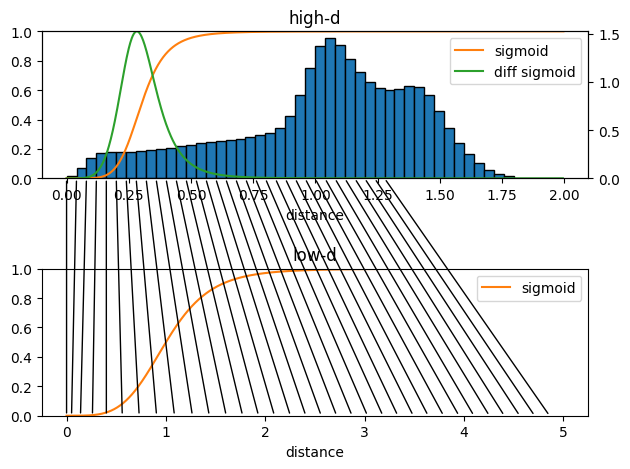

In [9]:
parameters.dist_sig_parameters = (0.3, 6, 6, 1, 4, 6)
em.plot.distance_histogram(high_d_data, 
                           parameters.periodicity, 
                           parameters.dist_sig_parameters,
                           bins=50)

The upper plot shows the high-d sigmoid function and the pairwise distances histogram, the plot also shows the derivative of the sigmoid function. This derivative shows the sensitive range of the distance based part of the cost function. As it is not possible to preserve all pairwise distances in the low-d representation we want to tune this sensitive range to match distances which are most important for us. Usually very short distances are not important for the structure of a data set as these distances stem from points inside the same local region. Long distances might be interesting but can hardly be reproduced in a lower dimensional representation. Somewhere in between are the most important distances which contain the information how local regions in the data are connected to neighboring regions.

The lower plot shows the low-d sigmoid function. The black lines connecting the plots of the high-d sigmoid and the low-d sigmoid indicate to which low-dimensional distances high-dimensional distences will ideally be mapped with your choice of sigmoid parameters.

The sigmoid parameters for the low-d space can be selected according to the following rules:  
`sig_l` = 1  (is irrelevant as it only scales the low-dimensional map)  
`a_l` = a_h * n_dimensions_l / n_dimensions_h  
`b_l`= b_h  
Further information about the the selection of these sigmoid parameters can be found in the [Sketchmap literature](http://sketchmap.org). 

Feel free to play with different sigmoid parameters and see how the sigmoid function changes in the previous cell. I recommend to continue the tutorial with (0.3, 6, 6, 1, 4, 6) for a start but you can come back later and changes these parameters.

## Get more info about parameters

To get more information from your parameters use the `.parameters` attribute.

In [10]:
print(parameters.parameters)

    Parameter            | Value                    | Description                                         
    ---------------------+--------------------------+---------------------------------------------------  
    n_neurons            | [128, 128, 2]            | List containing number of neurons for each layer    
                         |                          | up to the bottleneck layer. For example [128, 128,  
                         |                          | 2] stands for an autoencoder with the following     
                         |                          | architecture {i, 128, 128, 2, 128, 128, i} where i  
                         |                          | is the number of dimensions of the input data.      
                         |                          | These are Input/Output Layers that are not          
                         |                          | trained.                                            
    ---------------------+-----------

## Performe Dimensionality Reduction

Now that we have set up the parameters and loaded the data, it is very simple to performe the dimensionality reduction. All we need to do is to create an EncoderMap object and call its `train` method. The EncoderMap object takes care of setting up the neural network autoencoder and once you call the `train` method this network is trained to minimize the cost function as specified in the parameters.

In [11]:
e_map = em.EncoderMap(parameters, high_d_data)
e_map.train()

2023-02-06 17:10:09.095046: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/hostedtoolcache/Python/3.9.16/x64/lib
2023-02-06 17:10:09.095084: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-06 17:10:09.095106: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fv-az570-137): /proc/driver/nvidia/version does not exist
2023-02-06 17:10:09.095765: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Output files are saved to runs/cube/run0 as defined in 'main_path' in the parameters.


  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s, Loss after step ?=?]

  0%|          | 1/200 [00:02<07:18,  2.21s/it, Loss after step ?=?]

  4%|▍         | 9/200 [00:02<07:01,  2.21s/it, Loss after step 10=37.1]

  6%|▌         | 12/200 [00:02<00:26,  7.08it/s, Loss after step 10=37.1]

 10%|▉         | 19/200 [00:02<00:25,  7.08it/s, Loss after step 20=13]  

 10%|█         | 21/200 [00:02<00:13, 13.61it/s, Loss after step 20=13]

 14%|█▍        | 29/200 [00:02<00:12, 13.61it/s, Loss after step 30=6.88]

 16%|█▌        | 31/200 [00:02<00:07, 22.37it/s, Loss after step 30=6.88]

 20%|█▉        | 39/200 [00:02<00:07, 22.37it/s, Loss after step 40=5.52]

 20%|██        | 41/200 [00:02<00:04, 31.88it/s, Loss after step 40=5.52]

 24%|██▍       | 49/200 [00:02<00:04, 31.88it/s, Loss after step 50=7.36]

 25%|██▌       | 50/200 [00:02<00:03, 40.42it/s, Loss after step 50=7.36]

 30%|██▉       | 59/200 [00:02<00:03, 40.42it/s, Loss after step 60=6.03]

 30%|███       | 60/200 [00:02<00:02, 50.93it/s, Loss after step 60=6.03]

 34%|███▍      | 69/200 [00:02<00:02, 50.93it/s, Loss after step 70=6.27]

 36%|███▌      | 71/200 [00:02<00:02, 62.09it/s, Loss after step 70=6.27]

 40%|███▉      | 79/200 [00:03<00:01, 62.09it/s, Loss after step 80=6.73]

 40%|████      | 81/200 [00:03<00:01, 67.90it/s, Loss after step 80=6.73]

 44%|████▍     | 89/200 [00:03<00:01, 67.90it/s, Loss after step 90=4.95]

 46%|████▌     | 91/200 [00:03<00:01, 73.57it/s, Loss after step 90=4.95]

 50%|████▉     | 99/200 [00:03<00:01, 73.57it/s, Loss after step 100=4.81]

 50%|█████     | 101/200 [00:04<00:04, 22.19it/s, Loss after step 100=4.81]

 55%|█████▍    | 109/200 [00:04<00:04, 22.19it/s, Loss after step 110=6]   

 55%|█████▌    | 110/200 [00:04<00:03, 28.13it/s, Loss after step 110=6]

 60%|█████▉    | 119/200 [00:04<00:02, 28.13it/s, Loss after step 120=5.07]

 60%|██████    | 120/200 [00:04<00:02, 35.92it/s, Loss after step 120=5.07]

 64%|██████▍   | 129/200 [00:04<00:01, 35.92it/s, Loss after step 130=4.71]

 65%|██████▌   | 130/200 [00:04<00:01, 44.31it/s, Loss after step 130=4.71]

 70%|██████▉   | 139/200 [00:04<00:01, 44.31it/s, Loss after step 140=5.41]

 70%|███████   | 140/200 [00:04<00:01, 52.75it/s, Loss after step 140=5.41]

 74%|███████▍  | 149/200 [00:04<00:00, 52.75it/s, Loss after step 150=6.2] 

 75%|███████▌  | 150/200 [00:04<00:00, 61.01it/s, Loss after step 150=6.2]

 80%|███████▉  | 159/200 [00:04<00:00, 61.01it/s, Loss after step 160=4.83]

 80%|████████  | 160/200 [00:04<00:00, 68.79it/s, Loss after step 160=4.83]

 84%|████████▍ | 169/200 [00:05<00:00, 68.79it/s, Loss after step 170=6.06]

 85%|████████▌ | 170/200 [00:05<00:00, 74.58it/s, Loss after step 170=6.06]

 90%|████████▉ | 179/200 [00:05<00:00, 74.58it/s, Loss after step 180=4.64]

 90%|█████████ | 181/200 [00:05<00:00, 82.49it/s, Loss after step 180=4.64]

 94%|█████████▍| 189/200 [00:05<00:00, 82.49it/s, Loss after step 190=6.56]

 96%|█████████▌| 191/200 [00:05<00:00, 85.13it/s, Loss after step 190=6.56]

100%|█████████▉| 199/200 [00:05<00:00, 85.13it/s, Loss after step 200=5.76]

100%|██████████| 200/200 [00:06<00:00, 32.13it/s, Loss after step 200=5.76]

Once the network is trained we can feed high dimensional data into the encoder part of the network and read the values from the bottleneck layer. That is how we project data to the low dimensional space. The following line projects all our high-dimensional data to the low-dimensional space:

In [12]:
low_d_projection = e_map.encode(high_d_data)

Let's have a look at the result and plot the data:

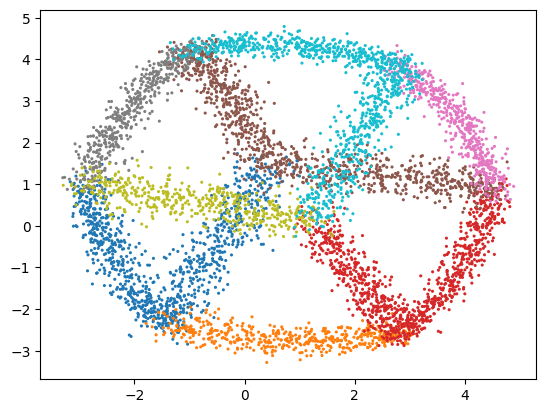

In [13]:
fig, ax = plt.subplots()
ax.scatter(low_d_projection[:, 0], low_d_projection[:, 1], c=ids, s=5, marker="o", linewidths=0, cmap="tab10")
plt.show()

## Generate High-Dimensional Data

We can not only use the encoder part of the network to project points the to the low-dimensional space. Also, the inverse procedure is possible using the decoder part of the Network. This allows to project any point from the low-dimensional space to the high dimensional space.  
In the following we feed all low-dimension points into the decoder part of the network to generate high dimensional points:

In [14]:
generated = e_map.generate(low_d_projection)

Let's have a look at these generated point:

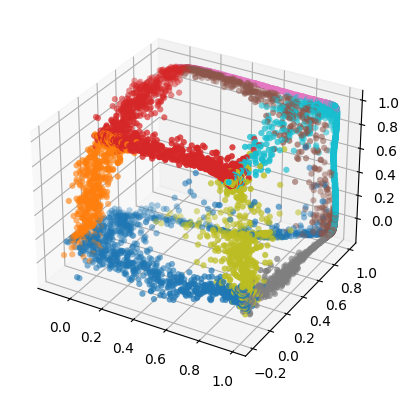

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(generated[:, 0], generated[:, 1], generated[:, 2], c=ids, marker="o", linewidths=0, cmap="tab10")
plt.show()

You probable see again a cube like structure. The reconstruction, however, will not be perfect, as information is lost when the data is projected to a lower dimensional space.

## Conclusion

In this tutorial you have learned how to set parameters, run the dimensionality reduction and how to project points from the high-dimensional space to the low dimensional space and vice versa.